## Лабораторная работа № 15. Понижение размерности.
### (Валяев Георгий, ПИ20-6)

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

### Задания для выполнения

##### 1. Загрузите прилагающийся датасет credit_data.
##### 2. Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [83]:
dataframe = pd.read_csv('data/credit_data.csv', delimiter=',')
dataframe

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


###### Отследим столбцы с пустыми значениями

In [84]:
dataframe.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

###### Удалим столбцы не несущие какой-либо полезной информации, а также вынесем метки строк в отдельный массив target:

In [85]:
data = dataframe.drop(['Risk', 'Unnamed: 0', 'Purpose'], axis=1)
target = dataframe['Risk']
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,NaN,little,1169,6
1,22,female,2,own,little,moderate,5951,48
2,49,male,1,own,little,NaN,2096,12
3,45,male,2,free,little,little,7882,42
4,53,male,2,free,little,little,4870,24
...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12
996,40,male,3,own,little,little,3857,30
997,38,male,2,own,little,NaN,804,12
998,23,male,2,free,little,little,1845,45


###### Заменим текстовые категориальные признаки на числовые с помощью функции map. Пустые значения в столбцах заменим на 0.

In [74]:
data['Saving accounts'] = data['Saving accounts'].map({"little": 1, "moderate": 2, "quite rich": 3, "rich": 4})
data['Checking account'] = data['Checking account'].map({"little": 1, "moderate": 2, "rich": 3})
target = target.map({"good": 1, "bad": 0})
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

In [75]:
data['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [76]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,male,2,own,0.0,1.0,1169,6
1,22,female,2,own,1.0,2.0,5951,48
2,49,male,1,own,1.0,0.0,2096,12
3,45,male,2,free,1.0,1.0,7882,42
4,53,male,2,free,1.0,1.0,4870,24
...,...,...,...,...,...,...,...,...
995,31,female,1,own,1.0,0.0,1736,12
996,40,male,3,own,1.0,1.0,3857,30
997,38,male,2,own,1.0,0.0,804,12
998,23,male,2,free,1.0,1.0,1845,45


##### 3. Выведите информацию о количественных параметрах датасета;

In [86]:
new_data = pd.get_dummies(data)
new_data

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
0,67,2,1169,6,0,1,0,1,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,1,0,0,0,0,1,0
2,49,1,2096,12,0,1,0,1,0,1,0,0,0,0,0,0
3,45,2,7882,42,0,1,1,0,0,1,0,0,0,1,0,0
4,53,2,4870,24,0,1,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,0,1,0,1,0,0,0,0,0,0
996,40,3,3857,30,0,1,0,1,0,1,0,0,0,1,0,0
997,38,2,804,12,0,1,0,1,0,1,0,0,0,0,0,0
998,23,2,1845,45,0,1,1,0,0,1,0,0,0,1,0,0


##### 4. Разделите эти данные на тестовую и обучающую выборки;

In [87]:
x_train, x_test, y_train, y_test = train_test_split(new_data, target, test_size=0.2)

##### 5. Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [88]:
clf = RandomForestClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

##### 6. Оцените полученную модель с помощью метрик.

In [89]:
print(f'score model = {clf.score(x_test, y_test)}')
print(f'accuracy = {metrics.accuracy_score(y_test, y_pred)}')
print(f'precision = {metrics.precision_score(y_test, y_pred, pos_label="good")}')
print(f'recall = {metrics.recall_score(y_test, y_pred, pos_label="good")}')
print(f'f1 = {metrics.f1_score(y_test, y_pred, pos_label="good")}')

score model = 0.78
accuracy = 0.78
precision = 0.8343558282208589
recall = 0.8888888888888888
f1 = 0.860759493670886


##### 7. Понизьте размерность данных с помощью метода главных компонент.

In [90]:
y = KMeans().fit_predict(new_data)
X = normalize(new_data)
x_PCA = PCA(n_components=2).fit_transform(X, 2)
print(x_PCA.shape)

(1000, 2)


##### 8. Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [101]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_PCA, target, test_size=0.2)
clf = RandomForestClassifier(max_depth=5)
clf.fit(x_train1, y_train1)
y_pred1 = clf.predict(x_test1)
print(f'score model = {clf.score(x_test1, y_test1)}')
print(f'accuracy = {metrics.accuracy_score(y_test1, y_pred1)}')
print(f'precision = {metrics.precision_score(y_test1, y_pred1, pos_label="good")}')
print(f'recall = {metrics.recall_score(y_test1, y_pred1, pos_label="good")}')
print(f'f1 = {metrics.f1_score(y_test1, y_pred1, pos_label="good")}')

score model = 0.75
accuracy = 0.75
precision = 0.7487179487179487
recall = 0.9931972789115646
f1 = 0.8538011695906432


##### 9. Постройте график зависимости точности модели от размерности данных.

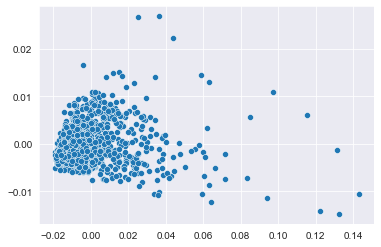

In [67]:
sns.scatterplot(x=x_PCA[:, 0], y=x_PCA[:, 1])
plt.show()

##### 10. Сделайте вывод о применимости модели.

###### Модель можно применять, т.к. после понижения размерности до 2 ключевых категорий и повторного обучения через модель классификации случайных лесов получаются хорошие потенциальные результаты по метрикам эффективности (precision, score, recall, f1-score — все эти показатели значительно расположены в районе 75%, что уже считается благоприятным результатом для дальнейшей практичности этой модели на реальных данных